# Predicting Housing Price for California Hosuing Prices Dataset




# Importing the necessary libraries

In [1]:
# Common imports
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# random seed to make output stable across runs
np.random.seed(42)

# imports for data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Getting the data

In [2]:
import os
import tarfile
from six.moves import urllib

root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
path = os.path.join("datasets", "housing")
source = root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=source, path=path):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_data(housing_path=path):
    csv = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv)


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

In [6]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Above we can see the top 5 rows of the dataset with the "head()" method.

Each row represents one district. The dataset has 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Now we can see a brief description of the data using the "info()" method above.

We can see that ocean_proximity is not numerical and probably a categorical attribute. We can find out how many districts belong to each attribute by using the "value_counts()" method, which I used below.

In [8]:
# check for null values again
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Now using the "describe()" method to show a summary of the numerical attributes:

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting a histogrom of each numerical attribute

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

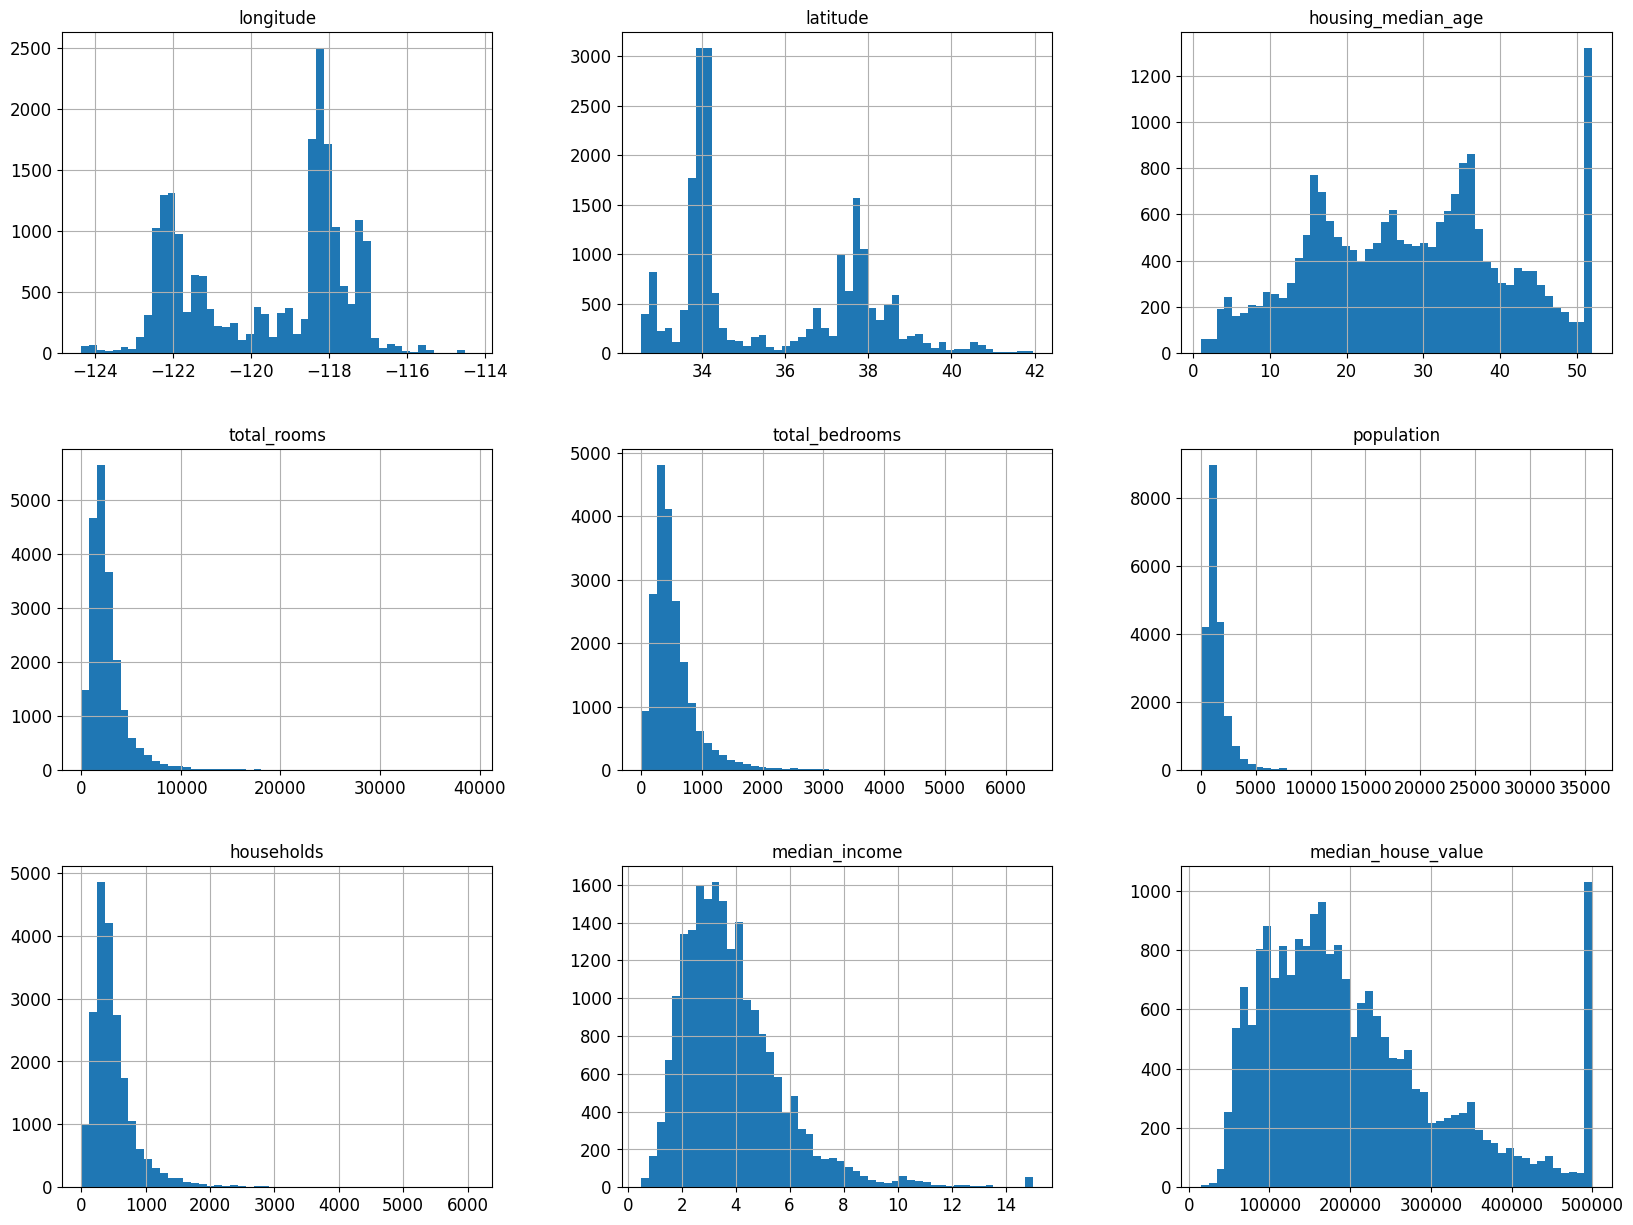

In [11]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

# Splitting the data into Train & Test

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

16512 Train Instances + 4128 Test Instances


Now transforming the median_income attribute into a categorical one by dividing the median income by 1.5 to limit the number of income categories and rounds it up using "np.ceil()" to have discrete categories. It merges all the categories that are greater than 5 into category 5. The categories are represented in the histogram below the code.

In [13]:
import numpy as np
housing["income_categories"] = np.ceil(housing["median_income"] / 1.5)
housing["income_categories"].where(housing["income_categories"] < 5, 5.0, inplace=True)

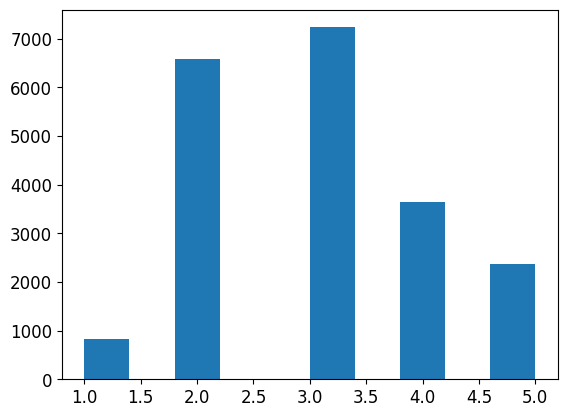

In [14]:
import matplotlib.pyplot as plt
plt.hist(housing["income_categories"])
fig = plt.gcf()

Stratifiing sampling based on the income categories by using sklearn's "StratifiedShuffleSplit" class:

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

The code below just generates the table and compares the different sampling types.

In [16]:
def income_categories_proportions(data):
    return data["income_categories"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_categories_proportions(housing),
    "Stratified": income_categories_proportions(strat_test_set),
    "Random": income_categories_proportions(test_set),
}).sort_index()

In [17]:
compare_props

,Overall,Stratified,Random
income_categories,,,
1.0,0.039826,0.039971,0.040213
2.0,0.318847,0.318798,0.324370
3.0,0.350581,0.350533,0.358527
4.0,0.176308,0.176357,0.167393
5.0,0.114438,0.114341,0.109496


Now we want to remove the income_categoreis attribute because we don't need it anymore.

In [18]:
housing  = housing.drop(['income_categories'], axis=1)

# Extensive Data Exploration

First of all, let's visualize the geographical data with latitude and longitude. A good way to do this is to create a scatterplot of all the districts. We will set alpha equal to 0.1, because then the scatterplot has a high density and therefore it is much easier to visualize.

<Axes: xlabel='longitude', ylabel='latitude'>

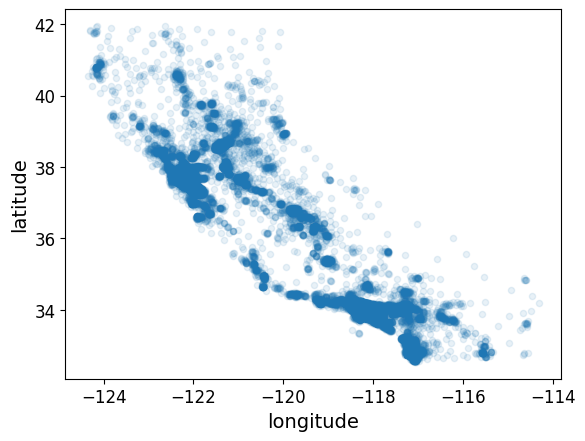

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now we will look at the housing prices at the scatterplot below. The color represents the price and the radius of each circle represents the districts population.



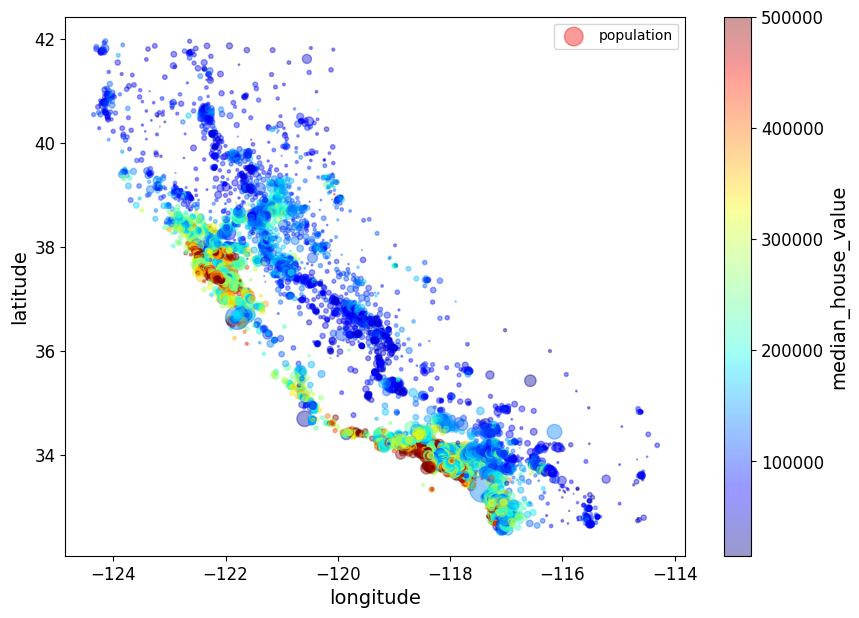

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


We can see from the scatterplot that housing costs are correlated with location (near the ocean) and population density, but since Northern California's coastal districts don't have very high housing costs, we can't apply that rule as simply as that.

# Searching for Correlations:

The housing dataset isn't that large and therefore we can easily compute the correlations between every attribute using the "corr()" method. We will start by looking how much each attribute is correlated to the median house value.

In [89]:
correlations = housing.corr()
correlations["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The coefficient of the correlation ranges from 1 to -1. The closer it is to 1 the more correlated it is and vice versa. Correlations that are close to 0, means that there is no correlation, neither negative or positive. We can see that the median_income is correlated the most with the median house value. Because of that, we will generate a more detailed scatterplot below:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

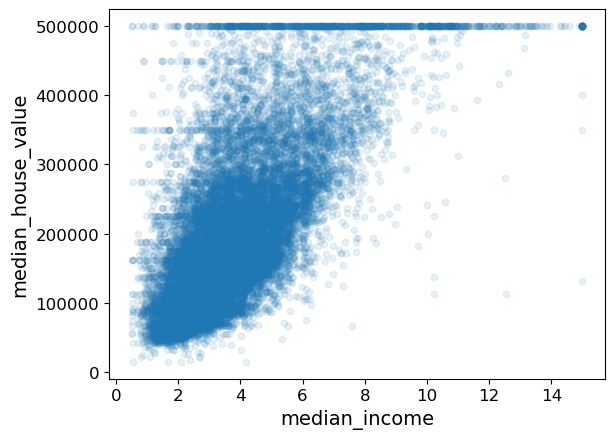

In [90]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


Before we now actually prepare the data to fed it into the model, we should think about combinating a few attributes. For example, the number of rooms within a district is of course not very helpful, if we don't know how many households are within that district. We want the number of rooms per household. The number of bedrooms isn't that helpful for the same reason, but it would make sense to compare it with the total number of rooms within a household. Also the population per household would be an interesting attribute. I will create these new attributes in the code below and then we will look at the correlation matrix again.

In [91]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [92]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Now we see, that the bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms. Houses with a lower bedroom/room ratio tend to be more expensive. The rooms_per_household attribute is also better than the total number of rooms in a district. Obviously the larger the house, the higher the price.

# Data Preparation


Now it is time to prepare the data so that our model can process it. We will write functions that do this instead of doing it manually. The reason for this is, that we can reuse these on a new dataset and at new projects you will work on. But first, let's revert to a clean training set by copying start_train_set and let's separate the predictors and the labels since we don't necessarily want to apply the same tranformations to the predictors and the target values.

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

We noticed earlier that the total_bedrooms attribute has some missing values. Most Machine Learning algorithms can't work with datasets that have missing values.

In [22]:
median = housing["total_bedrooms"].median()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop('ocean_proximity', axis=1)

Now we can fit the Imputer instance to the training data using the "fit()" method.

In [23]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in the statistics variable. We apllied the imputer to all numerical attributes, because it's safer if your system will go live sometimes.

Now we can use the trained imputer to replace the missing values by the learned medians. This results in a plain numpy array but we will transform it back into a pandas dataframe. We will do these 2 steps in the code below.

In [24]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
housing_tr  = housing_tr.drop(['income_categories'], axis=1)


In [25]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


# Processing Categorical Attributes and Text

Like I already mentioned most of the machine learning algorithms can just work with numerical data. The ocean_proximity attribute is still a categorical feature and we will convert it now. We can use Pandas' factorize() method to convert this string categorical feature to an integer categorical feature.

In [26]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2], dtype=int64)

In [27]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

One issues with this solution is that our algorithm will assume that two nearby values are more similar than two distant values, which is obviously not the case. For axample category 0 and 4 are more similar than categories 0 and 1. A common solution for this problem is to create one binary attribute per category: one attribute equal to 1 when the ctaegory is "<1H OCEAN" and 0 otherwise, another attribute equal to 1 when the category is "INLAND" and 0 otherwise, and so on. This is called "one-hot-encoding", because only one attribute will be equal to 1 (hot) and the others will be 0 (cold).

We will do exactly this in the code cell below. We use the OneHotEncoder encoder, that sklearn provides, to convert numeric categorical values into one-hot vectors. Note that "fit_transform()" expects a 2D array but "housing_cat" is a 1D array. Therefore we need to reshape it.

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The output is a so called Scipy sparse matrix and not a numpy array. A sparse matrix only stores the location of the non zero elements and doesn't stores a matrix full of zeros except for one per row. This saves a lot of memory and is very useful when we have categorical attributes with thousands of categories. For simplicity reasons we want it to be a usual numpy array and therefore we convert it in the code cell below, using the "toarray()" method.

In [29]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Note that there is a way that combines the two steps in one shot ( from categories to integer categories and then from integer categories to one-hot vectors). We can use Scikit-Learn's upcoming CategoricalEncoder class, which will soon be added to Scikit-Learn

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

The CategoricalEncoder expects a 2D array, containing one or more categorical input features. We need to reshape housing_cat to a 2D array:

In [31]:
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:107: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:142: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:144: DeprecationWarning: `np.int` is a deprecated alias f

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

We use toarray() again to get a dense array:

In [32]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom transfer

Now we will create a class and implement the three following mehtods: fit(), transform() and fit_transform(). To illustrate this, I wrote a small transformer class below that adds the combined attributes:

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [35]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2.0,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5.0,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2.0,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2.0,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3.0,6.096552,3.167241


Here the transformer has one hyperparameter, which is set to true by default and allows you to easily find out whether adding this attribute helps the machine learning model or not. We can add any hyperparameter to get any data preparation steps we are not sure about. The more we automate the data prepration steps, the more combinations we can try out, which therefore makes it much more likely that we will find a great one and save a lot of time.

# Applying Feature Scaling



#  - Pipelines for tranformation

There are a lot of data tranformation steps that also need to be done in the right order to help us with that, sklearn provides the Pipeline class. In the code below, we can see a small pipeline of attributes:

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as Imputer

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

This will tranform our data by selecting the desired attributes, dropping the others and converting the resulting dataframe into a NumPy array. With this in mind we can easily write a pipeline that takes a Pandas dataframe and handle only the numerical values. Just started the pipeline with a DataFrameSelector to pick only the numerical attributes. And we can just as easily write another one for the categorical attributes, by simply selecting categorical attributes using a DataFrameSelector and then applying a LabelBinarizer.

In [39]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

Joining these two pipelines into a single pipeline, using sklearns FeatureUnion:

In [40]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

The code below runs the whole pipeline:

In [41]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:107: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:142: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:144: DeprecationWarning: `np.int` is a deprecated alias f

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])



# Train Models

We looked at the big picture of the problem and framed it, we explored and visualized the data and preprocessed it. Now it is time to select and train a Machine Learning model.

# First, let's test whether a Linear Regression model gives us a satisfying result:

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Let's try it out on the training set:

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:142: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10924\3307725617.py:144: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

In [44]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Let's use RMSE (Root Mean Squared Error) to judge the quality of our predictions:

In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

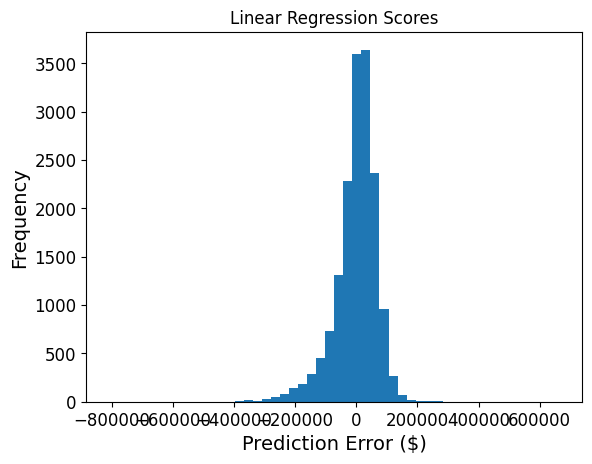

In [46]:
import matplotlib.pyplot as plt

errors = housing_predictions - housing_labels
plt.hist(errors, bins=50)
plt.title("Linear Regression Scores")
plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.show()

This is clearly not a great score. 

Let's try out a more powerful model since we just only tested one.

# Let's use a DecisionTreeRegressor, which can find complex nonlinear relationships in the data:

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Let's try it out on the training set:

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This gives us no error at all, which means that we strongly overfitted our data. 

# Using K-Fold Cross-Validation to test how our model performs

The following code randomly splits the training set into 10 subset called folds. Then it trains and evaluates 10 times, using every fold once for either training or validation:

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Let's look at the result:

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


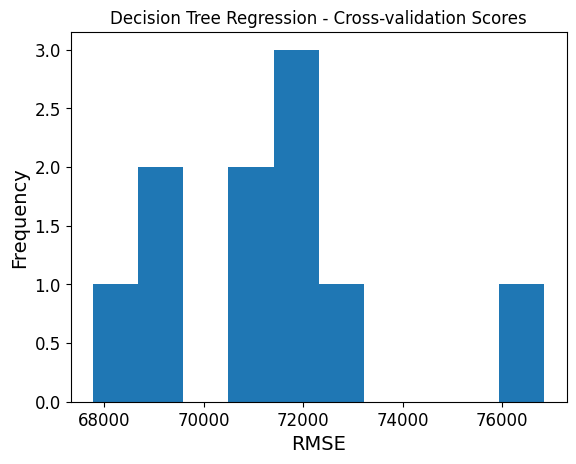

In [58]:
import matplotlib.pyplot as plt

plt.hist(tree_rmse_scores, bins=10)
plt.title("Decision Tree Regression - Cross-validation Scores")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.show()

Now we have a real estimate of how the decision tree performs. In fact, it does even perform worse than our previous linear regression model. Here we have a prediction error of 71,085 dollar. The standard deviation is 2,431 Dollar, which means that our prediction error could be $2,431 more or less.

# Now let's compute the scores for our linear regression model again, but using K-Fold Cross-Validation:

In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.7461275348583


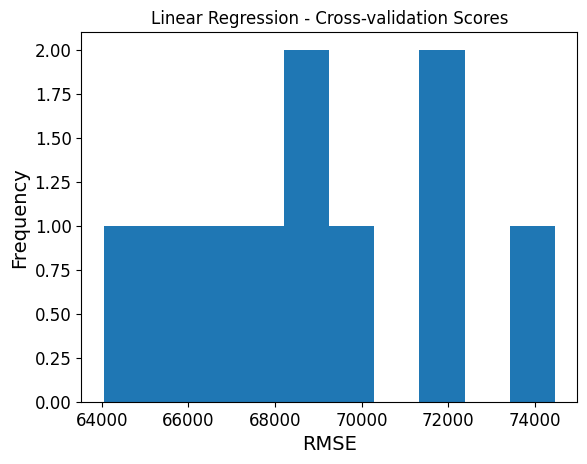

In [60]:
import matplotlib.pyplot as plt

plt.hist(lin_rmse_scores, bins=10)
plt.title("Linear Regression - Cross-validation Scores")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.show()

Now we defenitely know that our decision tree model is overfitting and performs worse than our linear regression model. 

# Now let's try one last model, the RandomForestRegressor. 

Random Forest works by training many Decision Trees on random subsets of the features and then it averages their predictions. Building a model on top of other models is called Essemble Learning and often pushes Machine Learning algortihms further.

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [62]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18675.224916252282

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


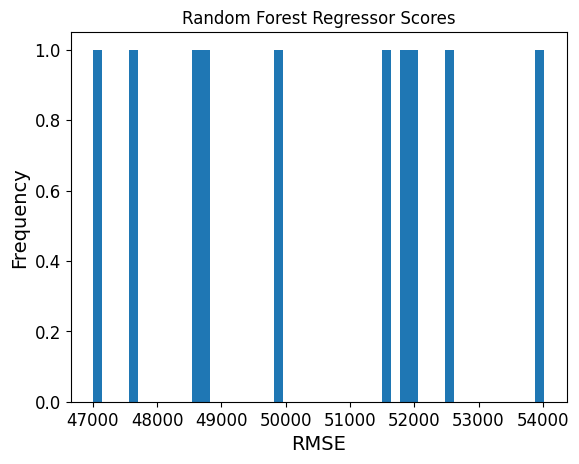

In [65]:
import matplotlib.pyplot as plt

plt.hist(forest_rmse_scores, bins=50)
plt.title("Random Forest Regressor Scores")
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.show()

This performs a lot better!

# Now to visualize the scores obtained from various algorithms, using a box plot, which allows to see the median, quartiles, and outliers of the scores distribution:

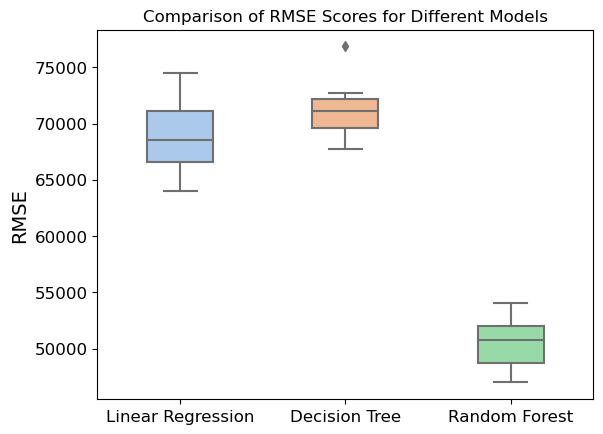

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=[lin_rmse_scores, tree_rmse_scores, forest_rmse_scores], 
            width=0.4, palette="pastel")
plt.xticks([0, 1, 2], ['Linear Regression', 'Decision Tree', 'Random Forest'])
plt.ylabel("RMSE")
plt.title("Comparison of RMSE Scores for Different Models")
plt.show()


# Fine Tuning

We will now use Grid Search to fine tune our model.

# Applying Grid Search

The code below searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [132]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

This tells us that the best solution would be by setting the max_features to 8 and the n_estimators to 30.

In [133]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

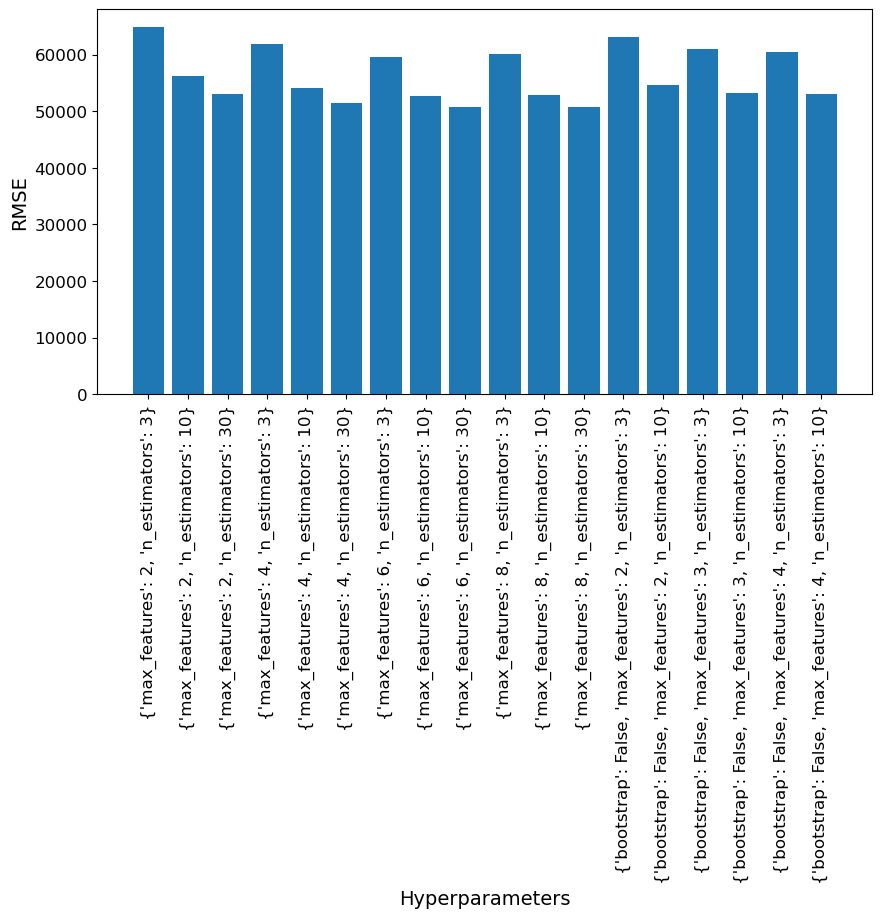

In [134]:
# Extract the mean test scores and hyperparameters from the cv_results_ dictionary
mean_test_scores = np.sqrt(-cvres["mean_test_score"])
params = [str(p) for p in cvres["params"]]

# Plot the mean test scores against the hyperparameters
plt.figure(figsize=(10, 5))
plt.bar(params, mean_test_scores)
plt.xlabel("Hyperparameters")
plt.ylabel("RMSE")
plt.xticks(rotation=90)
plt.show()

The RMSE score for this combinationis 50,804. Now you have succesfully fine tuned your model ! Alternatives to Grid Search would be Randomized Search (good for exploring many hyperparamter combinations) and Ensemble Methods.



# Evaluation

Now we can evaluate the final model on the test set. We just have to get the labels from your test set, run our full_pipeline to transform the data and eveluate the model:

In [135]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

C:\Users\Avinash Reddy\AppData\Local\Temp\ipykernel_11092\3307725617.py:142: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
C:\Users\Avinash Reddy\AppData\Local\Temp\ipykernel_11092\3307725617.py:144: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-not

In [136]:
final_rmse

48557.33618531538

# We now have a final prediciton error of $48,557

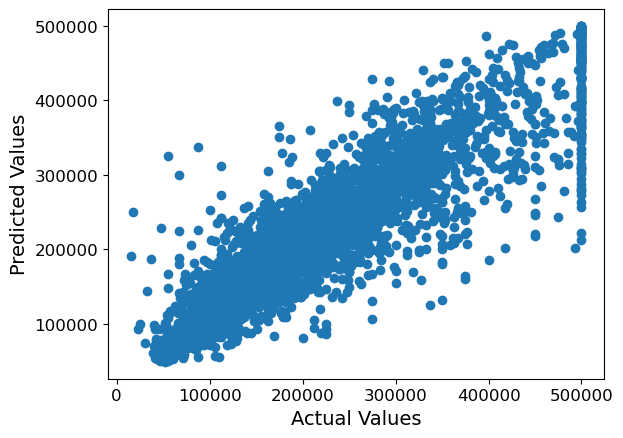

In [137]:
# plot predicted vs. actual values
plt.scatter(y_test, final_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Conclusion

Comparing the predicted vs. actual values, we can see that the points generally lie close to the 45-degree line, indicating that the model's predictions are relatively accurate. However, there are some points that are far from the line, which suggests that the model is not capturing all of the patterns in the data. Additionally, we can see that the model is underestimating the prices for some of the more expensive houses. This suggests that the model may not be capturing all of the factors that drive higher housing prices, such as location or unique features of the property. Overall, the model appears to be making reasonably accurate predictions, but there is still room for improvement.